<a href="https://colab.research.google.com/github/JF11579/New-Stuff/blob/main/Py_ACLED_5__25_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal

The goal is to identify all of the possible colations in the fighting in South Sudan.  Sometimes A & B fight against C&D and sometimes A & D firght against B & C.  *Why?* 

*"And for every pair of unique groups, I want to count how many times they fought together (allies) and how many times they faced each other (enemies) "*

# Notes

Text ananlyses on "notes".

# ACLED info : 

https://acleddata.com/2019/03/14/acled-introduces-new-event-types-and-sub-event-types/

## ACLED Code Book
    https://www.acleddata.com/wp-content/uploads/2015/01/ACLED_Codebook_2015.pdf


## ACLED Rsource Library
    https://acleddata.com/resources/general-guides/



# The columns.

 ## First 4 columns re Event Idenitfication.

    Data Id is an index of battles.  Not Permanent.  Subject to bien incorporated into another or number just revised


    ISO. Is a std country code usefull to merge with other data sets.

    EVENT ID Country column similar to data id .  Index  ,reference.  Blends Country and event into one.  Text Column.

    Event Id not country.  Similar but numeric.


    ## Next 3 columns re When the event took place

    Event date.

    TIME PRECISON.  If an event last 5 days each day would get its own row. Not recorded as s ingle act of violence.

    Year

    Time Precison: IKf the precise day of a event is known that is category1 ;  If the event is reported to have happened during some week that is category 2;within a month, the mid point of the month is used and this is categorized as group 3.  

## Cols H & I  Event Type adn Sub event

  Event typ : 6 possibilities. See the codebook
  More detail on event type.

##  Cols J to P Describe teh actors

  Actor1  and Actor 2 are teh primary combatants.  TORDER IMPLIES NOTHING.

  Associated Actors 1 & 2. can either be additional people fighting ont hat side, or a more specific naming of the group

Inter 1 and Inter 2 describe the Actors 1 & 2. Assigns all combatants to one of 8 categories. 
    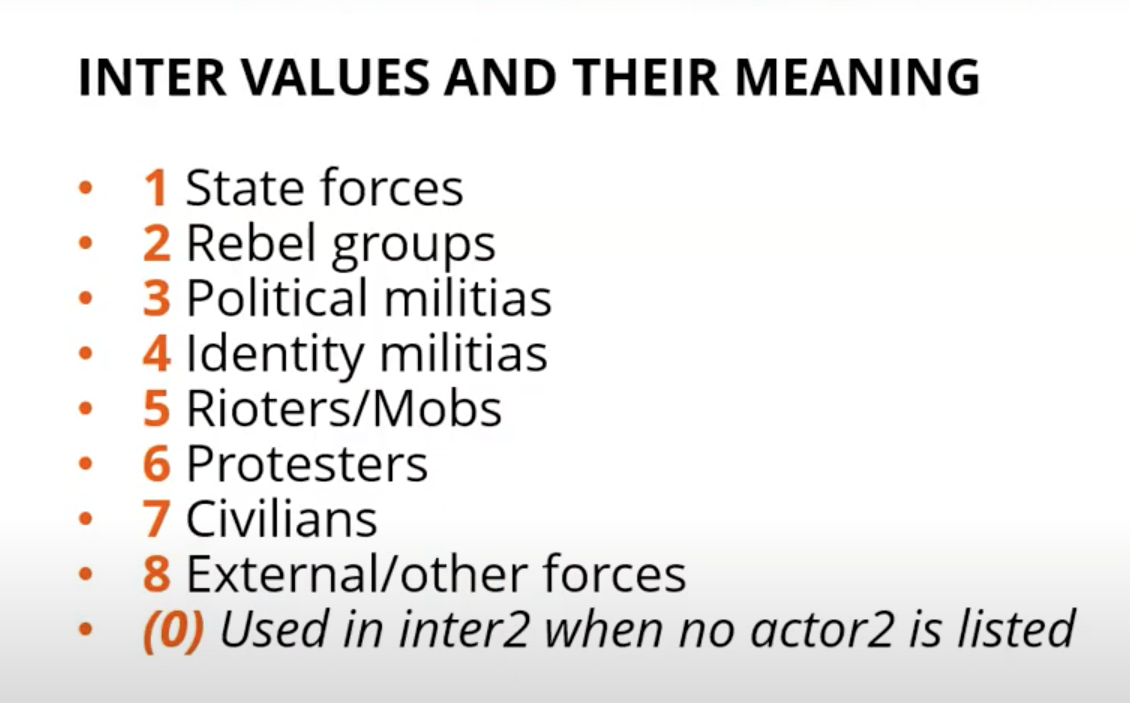

    



Dyadic : Actor_1 v Actor_2. Looks at battles

Monadic: looks at only 1 actor but brings up
         everywhere they have fought regardless 
         of againts who they fought.  e.g. A compendium
         of Boku Haram's fights

 
 For Mondadic data , from the Download page, click ACTOR BASED

Variables Explained Continued

**https://acleddata.com/resources/general-guides/**

Column P Interaction
 Concatenate Inter Actor 1 + Inter Actor 2 to form Interaction "37" i.e., Political malitias bttleing with Civilians.  NOTE THE SMALLEST DIGIT GOES FIRST REGARDLESS.  "37" NOT "73".  EXCEPTION. S single actor is "60" NOT "06".

 USEFUL. State repression is "17" : State forces ("1") battling cvilians ("7").

 ## Next 9 columns designate region
  Region: sucha s Cnetral America 
  Country:
  admin1 first local jurisdiction,c.f. State
  admin2 could be  or county
  Admin 3 : sub div of admnin 2
  :ocation Town , city , village, or neighborhood

Long and Lat.  Each location will use a single x.y coord.  I think all locations in Mexico city will go a single coor pair.

GEO PRECISION.
    1 the exact town is know
    2 only a small regionis known. 
    3 only a large region is known.

SOURCE Col Z
  Where did info come from?

Soource Scale . Is the  infor froma. local radio station or a national newspaper?

Cols AB "Qualitative info on the report" ???

Col AC FATALITIES
  If the area is a war zone but the precise # is unknows it is recorded as "10". . Otherwise it is. recorded as "3".

Col AD 
  API Time stamp.  the number of seconds since 1970. as recorded by the API each time an event is uploaded.

ISO 3 column.  Country code








# Libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

#pd.set_option("display.precision", 2)

from IPython.display import display

# Data

ACLED says their entire database is 1 million rows but by download came to only 300k with no filters applied.  ACLED has 2 versions of the data.  the DI version has on each line the two combatants.  The Mono version has only a single combatatnt on each line.  Teh second one woould be twice as long and together they would probably be over 1 milllion rows

###  We will download BOTH ACLED datasets.  Same info in 2 different formats.  "Pivot table"-like. Dyadic and Monodic.  Dyadic organized around incident showing .  Monodic organzide by each group.

 Note sometimes it starts to load before it is ready.

---



Code: https://drive.google.com/file/d/1GhBTYyAqqKyq6iJ6ynPOOqGoEZpQKgwV/view?usp=sharing

## Dyadic Data

In [17]:
Dyadic_data = pd.read_csv('/content/ACLED_May_25_2021.csv', error_bad_lines=False)

# sometimes import fails on the first attempt.  Just try again.


In [18]:
Dyadic_data.head(3)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,7995904,400,JOR930,930,21 May 2021,2021,1,Protests,Peaceful protest,Protesters (Jordan),NaN,6,NaN,NaN,0,60,Middle East,Jordan,Irbid,Qasabat Irbid,NaN,Irbid,32.5556,35.8500,2,Al Ghad (Jordan),National,"On 21 May 2021, protesters demonstrated in the...",0,1621902031,JOR
1,8001536,410,KOR17241,17241,21 May 2021,2021,1,Protests,Peaceful protest,Protesters (South Korea),KFEM: Korea Federation for Environmental Movement,6,NaN,NaN,0,60,East Asia,South Korea,North Gyeongsang,Bonghwa,NaN,Naeseong,36.8868,128.7403,1,YNA,National,"On 21 May 2021, members of environmental group...",0,1621956946,KOR
2,7996161,792,TUR16587,16587,21 May 2021,2021,1,Protests,Peaceful protest,Protesters (Turkey),Muslim Group (Turkey),6,NaN,NaN,0,60,Middle East,Turkey,Bitlis,Guroymak,NaN,Guroymak,38.5758,42.0156,1,Haberler,National,"On 21 May 2021, a Muslims gathered outside a m...",0,1621902032,TUR


In [ ]:
data.tail(3)

In [19]:
Dyadic_data.shape  # Hmmm.  ACLED's home page mentions that the data 
             # is more than 1 million rows.  Hmmmm
             # Well go rthrought this and then revisit to verify all of the data was downloade

(693128, 31)

In [ ]:
#data.columns

In [20]:
Dyadic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693128 entries, 0 to 693127
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   data_id           693128 non-null  int64  
 1   iso               693128 non-null  int64  
 2   event_id_cnty     693128 non-null  object 
 3   event_id_no_cnty  693128 non-null  int64  
 4   event_date        693128 non-null  object 
 5   year              693128 non-null  int64  
 6   time_precision    693128 non-null  int64  
 7   event_type        693128 non-null  object 
 8   sub_event_type    693128 non-null  object 
 9   actor1            693128 non-null  object 
 10  assoc_actor_1     288206 non-null  object 
 11  inter1            693128 non-null  int64  
 12  actor2            321409 non-null  object 
 13  assoc_actor_2     85858 non-null   object 
 14  inter2            693128 non-null  int64  
 15  interaction       693128 non-null  int64  
 16  region            69

In [21]:
Dyadic_data.describe() # Notice only Numerical data represented here.

,data_id,iso,event_id_no_cnty,year,time_precision,inter1,inter2,interaction,latitude,longitude,geo_precision,fatalities,timestamp
count,6.931280e+05,693128.000000,693128.000000,693128.000000,693128.000000,693128.000000,693128.000000,693128.000000,693128.000000,693128.000000,693128.000000,693128.000000,6.931280e+05
mean,7.113007e+06,454.543907,23586.048477,2019.492000,1.075859,4.335697,1.731647,41.063971,24.490561,20.574785,1.293556,0.615560,1.606535e+09
std,7.152687e+05,284.843223,24032.493764,0.950129,0.282830,2.149130,2.619171,21.531150,19.954037,62.144348,0.499168,3.004406,1.756149e+07
min,4.554781e+06,0.000000,1.000000,2018.000000,1.000000,1.000000,0.000000,10.000000,-54.924400,-166.534100,0.000000,0.000000,1.552576e+09
25%,6.819636e+06,196.000000,4430.000000,2019.000000,1.000000,2.000000,0.000000,16.000000,14.283300,-3.379000,1.000000,0.000000,1.601324e+09
50%,7.310694e+06,410.000000,13885.000000,2020.000000,1.000000,6.000000,0.000000,55.000000,31.319000,36.644000,1.000000,0.000000,1.614124e+09
75%,7.635576e+06,760.000000,39477.000000,2020.000000,1.000000,6.000000,2.000000,60.000000,36.843100,65.873300,2.000000,0.000000,1.618528e+09
max,8.001624e+06,894.000000,94285.000000,2021.000000,3.000000,8.000000,8.000000,88.000000,78.925700,177.510300,3.000000,600.000000,1.621957e+09


## Monodic Data

In [24]:
Monodic_data = pd.read_csv('/content/ACLED_Mondadic data_5_26_21.csv', error_bad_lines=False)

In [25]:
Monodic_data.head(3). # Notice there is no @nd actor.

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,7995904,400,JOR930,930,21 May 2021,2021,1,Protests,Peaceful protest,Protesters (Jordan),NaN,6,60,Middle East,Jordan,Irbid,Qasabat Irbid,NaN,Irbid,32.5556,35.8500,2,Al Ghad (Jordan),National,"On 21 May 2021, protesters demonstrated in the...",0,1621902031,JOR
1,8001536,410,KOR17241,17241,21 May 2021,2021,1,Protests,Peaceful protest,Protesters (South Korea),KFEM: Korea Federation for Environmental Movement,6,60,East Asia,South Korea,North Gyeongsang,Bonghwa,NaN,Naeseong,36.8868,128.7403,1,YNA,National,"On 21 May 2021, members of environmental group...",0,1621956946,KOR
2,8002304,104,MMR16790,16790,21 May 2021,2021,1,Battles,Armed clash,Military Forces of Myanmar (2021-),Police Forces of Myanmar (2021-),1,13,Southeast Asia,Myanmar,Kayah,Loikaw,Demoso,Ngwe Taung,19.5602,97.1806,2,Eleven Media Group,National,"On 21 May 2021, near Ngwe Taung village in Dem...",4,1621963948,MMR


In [26]:
Monodic_data.tail(3)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
1021675,7369214,76,BRA30923,30923,21 May 2018,2018,1,Protests,Peaceful protest,Protesters (Brazil),Labour Group (Brazil),6,60,South America,Brazil,Parana,Sao Sebastiao da Amoreira,NaN,Sao Sebastiao da Amoreira,-23.4647,-50.7605,2,G1,National,"On 21 May 2018, around Sao Sebastiao da Amorei...",0,1607555018,BRA
1021676,7357183,76,BRA24464,24464,21 May 2018,2018,1,Protests,Peaceful protest,Protesters (Brazil),Labour Group (Brazil),6,60,South America,Brazil,Rio Grande do Sul,Encruzilhada do Sul,NaN,Encruzilhada do Sul,-30.5441,-52.5212,1,Correio do Povo,Subnational,"On 21 May 2018, in Encruzilhada do Sul, Rio Gr...",0,1607554925,BRA
1021677,7822847,156,CHN7668,7668,21 May 2018,2018,2,Protests,Peaceful protest,Protesters (China),Labour Group (China),6,60,East Asia,China,Beijing,NaN,NaN,Beijing,39.9062,116.3913,3,CLB (China),Other,"Around 21 May 2018 (as reported), at least 9 e...",0,1618442058,CHN


In [27]:
Monodic_data.shape  # over 1 mil rows

(1021678, 28)

In [28]:
Monodic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021678 entries, 0 to 1021677
Data columns (total 28 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   data_id           1021678 non-null  int64  
 1   iso               1021678 non-null  int64  
 2   event_id_cnty     1021678 non-null  object 
 3   event_id_no_cnty  1021678 non-null  int64  
 4   event_date        1021678 non-null  object 
 5   year              1021678 non-null  int64  
 6   time_precision    1021678 non-null  int64  
 7   event_type        1021678 non-null  object 
 8   sub_event_type    1021678 non-null  object 
 9   actor1            1021678 non-null  object 
 10  assoc_actor_1     377408 non-null   object 
 11  inter1            1021678 non-null  int64  
 12  interaction       1021678 non-null  int64  
 13  region            1021678 non-null  object 
 14  country           1021678 non-null  object 
 15  admin1            1021644 non-null  object 
 16  

# South Sudan

In [29]:
South_Sudan = (Dyadic_data.loc[Dyadic_data['country'] =='South Sudan'])

In [30]:
South_Sudan.shape # 2300 incidents?  Is that too small or too big a number?

(2308, 31)

## Group South Sudan Subset

In [32]:
#df.groupby(["state", "gender"])["last_name"].count()
South_Sudan_Grouped =  South_Sudan.groupby(["actor1" , "actor2"])["country"].count()

In [33]:
South_Sudan_Grouped .head()

actor1                                                        actor2                                                     
Ador Clan Militia (South Sudan)                               Ciec Clan Militia (South Sudan)                                2
                                                              Civilians (South Sudan)                                        8
Agar Clan Dinka Ethnic Militia (Pakam Section) (South Sudan)  Agar Clan Dinka Ethnic Militia (Ruop Section) (South Sudan)    1
                                                              Civilians (South Sudan)                                        1
Agar Clan Dinka Ethnic Militia (South Sudan)                  Agar Clan Dinka Ethnic Militia (South Sudan)                   6
Name: country, dtype: int64

In [35]:
display(South_Sudan_Grouped)

actor1                                                        actor2                                                     
Ador Clan Militia (South Sudan)                               Ciec Clan Militia (South Sudan)                                2
                                                              Civilians (South Sudan)                                        8
Agar Clan Dinka Ethnic Militia (Pakam Section) (South Sudan)  Agar Clan Dinka Ethnic Militia (Ruop Section) (South Sudan)    1
                                                              Civilians (South Sudan)                                        1
Agar Clan Dinka Ethnic Militia (South Sudan)                  Agar Clan Dinka Ethnic Militia (South Sudan)                   6
                                                                                                                            ..
Yirol Communal Militia (South Sudan)                          Yirol Communal Militia (South Sudan)                  

In [37]:
South_Sudan_Grouped.to_csv('South_Sudan_Grouped.csv')


South Sudan Grouped data:

https://drive.google.com/file/d/18NgU0uiyTQiOhrGD-0mb3MJeCgQLQy64/view?usp=sharing

In [ ]:
display(South_Sudan_Grouped)

actor1                                                        actor2                                                     
Ador Clan Militia (South Sudan)                               Ciec Clan Militia (South Sudan)                                2
                                                              Civilians (South Sudan)                                        8
Agar Clan Dinka Ethnic Militia (Pakam Section) (South Sudan)  Agar Clan Dinka Ethnic Militia (Ruop Section) (South Sudan)    1
                                                              Civilians (South Sudan)                                        1
Agar Clan Dinka Ethnic Militia (South Sudan)                  Agar Clan Dinka Ethnic Militia (South Sudan)                   6
                                                                                                                            ..
Yirol Communal Militia (South Sudan)                          Yirol Communal Militia (South Sudan)                  

In [ ]:
display(South_Sudan_Grouped)

actor1                                                        actor2                                                     
Ador Clan Militia (South Sudan)                               Ciec Clan Militia (South Sudan)                                2
                                                              Civilians (South Sudan)                                        8
Agar Clan Dinka Ethnic Militia (Pakam Section) (South Sudan)  Agar Clan Dinka Ethnic Militia (Ruop Section) (South Sudan)    1
                                                              Civilians (South Sudan)                                        1
Agar Clan Dinka Ethnic Militia (South Sudan)                  Agar Clan Dinka Ethnic Militia (South Sudan)                   6
                                                                                                                            ..
Yirol Communal Militia (South Sudan)                          Yirol Communal Militia (South Sudan)                  

In [ ]:
display(South_Sudan_Grouped)

actor1                                                        actor2                                                     
Ador Clan Militia (South Sudan)                               Ciec Clan Militia (South Sudan)                                2
                                                              Civilians (South Sudan)                                        8
Agar Clan Dinka Ethnic Militia (Pakam Section) (South Sudan)  Agar Clan Dinka Ethnic Militia (Ruop Section) (South Sudan)    1
                                                              Civilians (South Sudan)                                        1
Agar Clan Dinka Ethnic Militia (South Sudan)                  Agar Clan Dinka Ethnic Militia (South Sudan)                   6
                                                                                                                            ..
Yirol Communal Militia (South Sudan)                          Yirol Communal Militia (South Sudan)                  

# ACLED Analsis with Tableau



In [27]:
South_Sudan.head(3)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
688,7993055,728,SSD7620,7620,20 May 2021,2021,1,Violence against civilians,Attack,Unidentified Communal Militia (South Sudan),Pastoralists (South Sudan),4,Civilians (South Sudan),Agar Clan Group (South Sudan); Dinka Ethnic Gr...,7,47.0,Eastern Africa,South Sudan,Lakes,Rumbek East,Akot,Akot,6.5495,30.0277,2.0,Eye Radio (South Sudan),National,"On 20 May 2021, unknown cattle raiders attacke...",0.0,1.621889e+09,SSD
691,7993059,728,SSD7621,7621,20 May 2021,2021,1,Battles,Armed clash,Atuot Ethnic Militia (South Sudan),Pastoralists (South Sudan),4,Atuot Ethnic Militia (South Sudan),Pastoralists (South Sudan),4,44.0,Eastern Africa,South Sudan,Lakes,Yirol West,Aluak-Luak,Aluak-Luak,6.4739,30.0992,2.0,Eye Radio (South Sudan),National,"On 20 May 2021, two groups of drunken youths (...",2.0,1.621889e+09,SSD
743,7993345,728,SSD7618,7618,19 May 2021,2021,1,Violence against civilians,Attack,Murle Ethnic Militia (South Sudan),Pastoralists (South Sudan),4,Civilians (South Sudan),Gun-Lou Clan Group (South Sudan); Nuer Ethnic ...,7,47.0,Eastern Africa,South Sudan,Jonglei,Uror,Pieri,Pieri,8.0448,32.0272,2.0,Radio Tamazuj,Regional,"On 19 May 2021, suspected Murle cattle raiders...",0.0,1.621889e+09,SSD


In [26]:
# create a South Sudan csv
South_Sudan.to_csv('South_Sudan.csv')

In [33]:
grouped = data.groupby('actor1') ['actor2'].count()

In [36]:
grouped.head(20)

actor1
19th Tennessee Infantry                                                           0
20th Division                                                                     4
217 Militia                                                                       0
229 Militia                                                                       0
309 Militia                                                                       0
400 Mawozo Gang                                                                  10
512 Militia                                                                       0
615 Militia                                                                       0
706 Militia                                                                       0
763 Militia                                                                       0
901 Militia                                                                       0
970 Militia                                                          

In [35]:
grouped.tail()

actor1
Zande Ethnic Militia (South Sudan)    2
Zawiya Communal Militia (Libya)       1
Zipak Communal Militia (Nigeria)      1
Zir Communal Militia (Syria)          1
Zombo Communal Militia (Uganda)       4
Name: actor2, dtype: int64